In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [ ]:
Рабочий файл с продажами в рублях, штуках и с остатками товаров в рублях и штуках. 
Выборка по семи филиалам с по-месячной разбивкой, начиная с 2014 года.
Цель исследования: визуализация данных и построение гипотез об уровне продаж

In [3]:
df = pd.read_excel('C:\\Users\\kuznecov.ap\\Desktop\\piton\\16 Визуализация данных\\sale_stock.xlsx')

In [4]:
# переведем продажи и запасы в штуках к integer
df['kz_stock_un'] = df.kz_stock_un.astype('Int64')
df['kr_stock_un'] = df.kr_stock_un.astype('Int64')
df['sb_stock_un'] = df.sb_stock_un.astype('Int64')
df['kz_sale_un'] = df.kz_sale_un.astype('Int64')
df['kr_sale_un'] = df.kr_sale_un.astype('Int64')
df['sb_sale_un'] = df.sb_sale_un.astype('Int64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         86 non-null     datetime64[ns]
 1   kz_stock_r   45 non-null     float64       
 2   kz_stock_un  45 non-null     Int64         
 3   kr_stock_r   36 non-null     float64       
 4   kr_stock_un  36 non-null     Int64         
 5   pz_stock_r   86 non-null     float64       
 6   pz_stock_un  86 non-null     int64         
 7   rz_stock_r   86 non-null     float64       
 8   rz_stock_un  86 non-null     float64       
 9   sb_stock_r   61 non-null     float64       
 10  sb_stock_un  61 non-null     Int64         
 11  sp_stock_r   86 non-null     float64       
 12  sp_stock_un  86 non-null     int64         
 13  ur_stock_r   86 non-null     float64       
 14  ur_stock_un  86 non-null     int64         
 15  kz_sale_r    44 non-null     float64       
 16  kz_sale_un

In [6]:
# выберем столбцы с продажами в рублях
dynamics_by_region = df[[x for x in df.columns if 'sale_r' in x] + ['data']] \
    .groupby('data').sum()
dynamics_by_region.head()

,kz_sale_r,kr_sale_r,pz_sale_r,rz_sale_r,sb_sale_r,sp_sale_r,ur_sale_r
data,,,,,,,
2014-01-01,0.0,0.0,19556122.99,2.100289e+08,0.0,-5241.87,18688400.55
2014-02-01,0.0,0.0,21082365.73,2.190602e+08,0.0,-277.71,20176816.40
2014-03-01,0.0,0.0,18624935.59,2.345173e+08,0.0,-1927.85,22870745.65
2014-04-01,0.0,0.0,32572446.78,2.992387e+08,0.0,-5723.71,30883934.87
2014-05-01,0.0,0.0,21379425.74,2.376562e+08,0.0,0.00,27438430.79


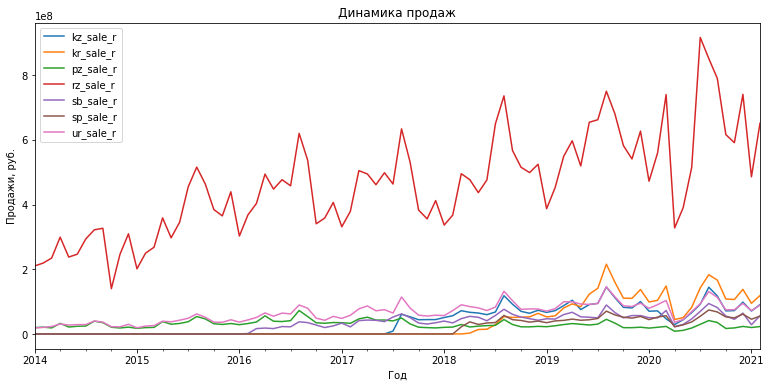

In [7]:
ax = dynamics_by_region.plot(title='Динамика продаж', 
                             xlabel='Год', 
                             ylabel='Продажи, руб.')


In [ ]:
Данный график иллюстрирует возрастающий тренд продаж с ярко-выраженной сезонностью по одному из филиалов "rz_sale_r". 
Далее будем рассматривать этот филилал

<AxesSubplot:title={'center':'График продаж сети филиалов'}>

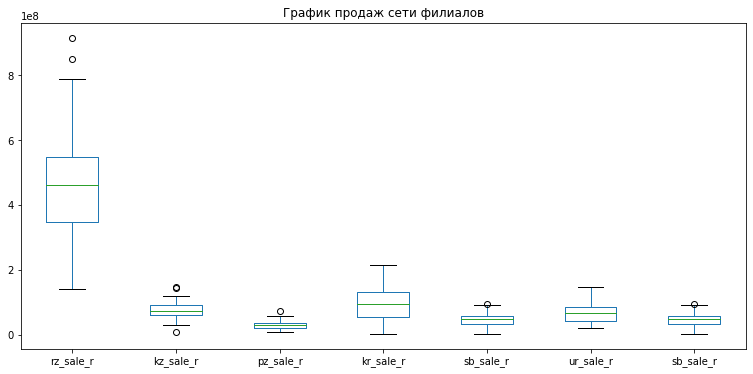

In [8]:
df[['rz_sale_r', 'kz_sale_r', 'pz_sale_r', 'kr_sale_r', 'sb_sale_r', 'ur_sale_r', 'sb_sale_r' ]].plot(kind='box',
                                        title='График продаж сети филиалов')

In [ ]:
Данный график показывает, что основные продажи проходят по филилу 'rz_sale_r'. 
Это видно по медиане, которая в 4-5 раз выше, чем у какого-либо филиала. 
Но при этом и разброс продаж гораздо больше. Продажи остальных филиалов примерно на одном уровне.

<AxesSubplot:title={'center':'График распределения продаж'}, ylabel='Frequency'>

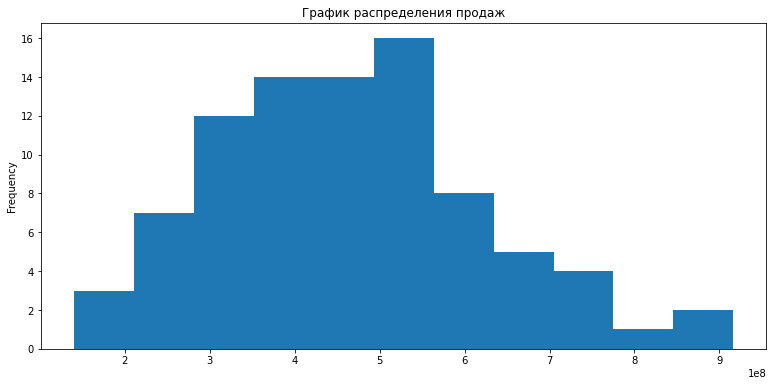

In [9]:
dynamics_by_region.rz_sale_r.plot(kind='hist', 
                   bins=11,
                   title='График распределения продаж')

In [ ]:
Продажи по филилу 'rz_sale_r' близки к нормальному распределению, 
поэтому можно будет в дальнейшем примемять статистики, которые учитывают нормальное распределение.

<AxesSubplot:xlabel='data'>

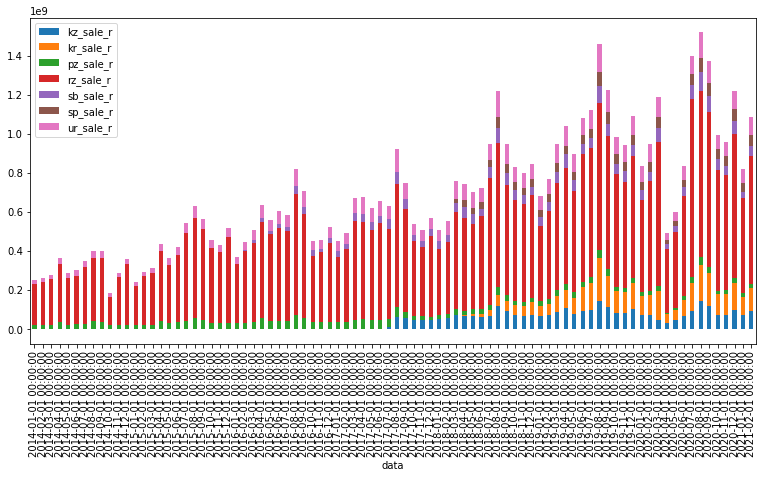

In [10]:
dynamics_by_region.plot(kind='bar', stacked=True)

In [ ]:
Из данного графика видно, что в целом продажи компнаии имеют восходящий тренд с сезонностью.

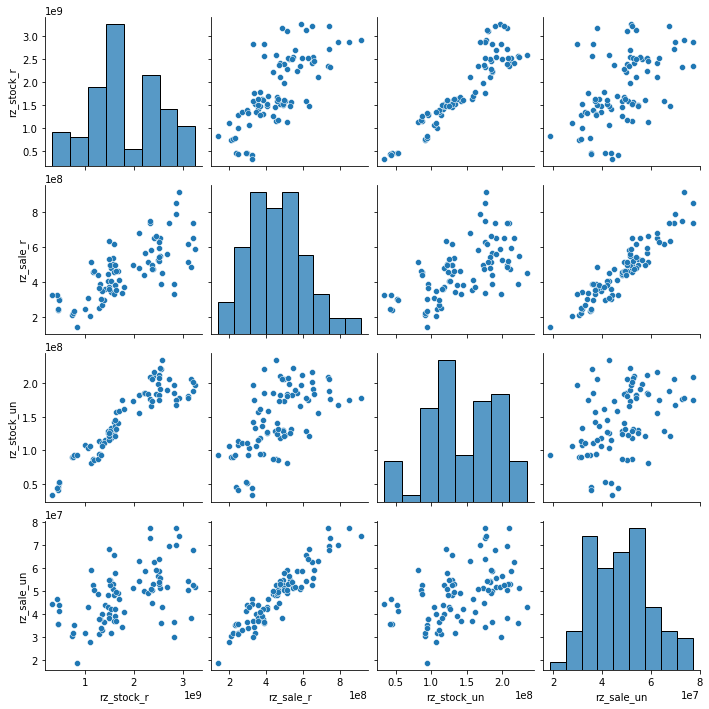

In [11]:
sns.pairplot(df[['rz_stock_r', 'rz_sale_r', 'rz_stock_un', 'rz_sale_un', 'data']])

In [ ]:
Данный график позволяет увидеть тесноту связи между между следующими показателям филиала 'rz":
- продажи в рублях
- продажи в штуках
- товарные запасы в рублях
- товарные запасы в штуках.
по графику видно, что между всеми этими показателями наблюдается тесная взаимозависимость с восходящим трендом.